In [3]:
import skimage
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
cat = io.imread('datasets/cat.png')
dog = io.imread('datasets/dog.png')
df=pd.DataFrame(['cat','dog'],columns=['image'])


In [6]:
print(cat.shape,dog.shape)

(168, 300, 3) (168, 300, 3)


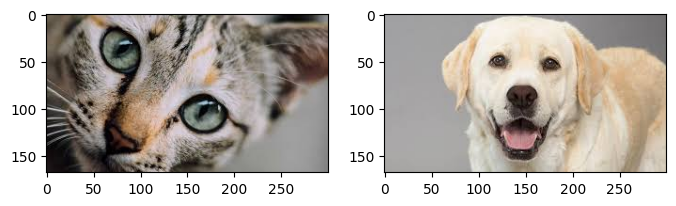

In [7]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat)
ax2=fig.add_subplot(1,2, 2)
ax2.imshow(dog)

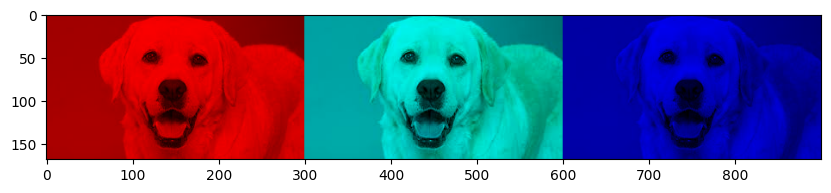

In [8]:
dog_r= dog.copy() 
dog_r[:,:,1] = dog_r[:,:,2] = 0
dog_g= dog.copy()
dog_g[:,:,0] = dog_r[:,:,2] = 0 
dog_b= dog.copy()
dog_b[:,:,0] = dog_b[:,:,1] = 0
plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize = (10,4))
plt.imshow(plot_image)

In [9]:
from skimage.color import rgb2gray
cgs=rgb2gray(cat)
dgs=rgb2gray(dog)
print('Image shape:', cgs.shape, '\n')

Image shape: (168, 300) 



In [11]:
# 2D pixel map
print('2D image pixel map') 
print(np.round(cgs, 2), '\n')

2D image pixel map
[[0.42 0.41 0.41 ... 0.5  0.52 0.53]
 [0.41 0.41 0.4  ... 0.51 0.52 0.54]
 [0.4  0.4  0.4  ... 0.52 0.54 0.55]
 ...
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]] 



In [12]:
# flattened pixel feature vector
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

Flattened pixel map: [0.42 0.41 0.41 ... 0.51 0.51 0.51]


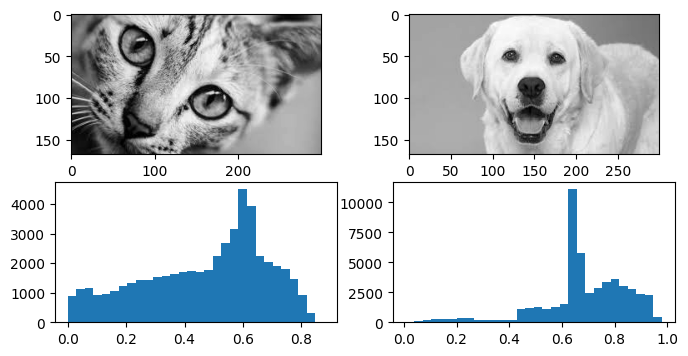

In [15]:
fig = plt.figure(figsize = (8,4)) 
ax1 = fig.add_subplot(2,2, 1) 
ax1.imshow(cgs, cmap="gray") 
ax2 = fig.add_subplot(2,2, 2) 
ax2.imshow(dgs, cmap='gray') 
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist (cgs. flatten(), bins=30) 
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, d_patches = ax4.hist (dgs. flatten(), bins=30)

In [16]:
from scipy.stats import describe
cat_rgb = cat.reshape((168*300), 3).T
dog_rgb = dog.reshape((168*300), 3).T
cs = describe (cat_rgb, axis=1)
ds = describe(dog_rgb, axis=1)
cat_rgb_range = cs.minmax [1] - cs.minmax[0] 
dog_rgb_range= ds.minmax[1] - ds.minmax[0]
rgb_range_df = pd.DataFrame([cat_rgb_range, dog_rgb_range],
columns=['R_range', 'G_range', 'B_range'])
pd.concat([df, rgb_range_df], axis=1)

,image,R_range,G_range,B_range
0,cat,240,223,235
1,dog,246,250,246


In [17]:
cat_stats= np.array([np.round(cs.mean, 2), np.round(cs.variance, 2), np.round(cs.kurtosis, 2), np.round(cs. skewness, 2),np.round(np.median (cat_rgb, axis=1), 2)]).flatten()
dog_stats= np.array([np.round (ds.mean, 2), np.round(ds.variance, 2), np.round(ds.kurtosis, 2), np.round(ds.skewness, 2), np.round(np.median (dog_rgb, axis=1), 2)]).flatten()

In [18]:
stats_df = pd.DataFrame([cat_stats, dog_stats],
columns=['R_mean', 'G_mean', 'B_mean', 'R_var', 'G_var', 'B_var', 'R_kurt', 'G_kurt', 'B_kurt', 'R_skew', 'G_skew', 'B_skew', 'R_med', 'G_med', 'B_med'])
pd.concat([df, stats_df], axis=1)

,image,R_mean,G_mean,B_mean,R_var,G_var,B_var,R_kurt,G_kurt,B_kurt,R_skew,G_skew,B_skew,R_med,G_med,B_med
0,cat,127.48,118.80,111.94,3054.04,2863.78,3003.05,-0.63,-0.77,-0.94,-0.48,-0.50,-0.25,140.0,132.0,120.0
1,dog,184.46,173.46,160.77,1887.71,1776.00,1574.73,1.30,2.24,2.32,-0.96,-1.12,-1.09,185.0,169.0,165.0
